In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

# Linear Regression

4/4 [==============================] - 0s 6ms/step


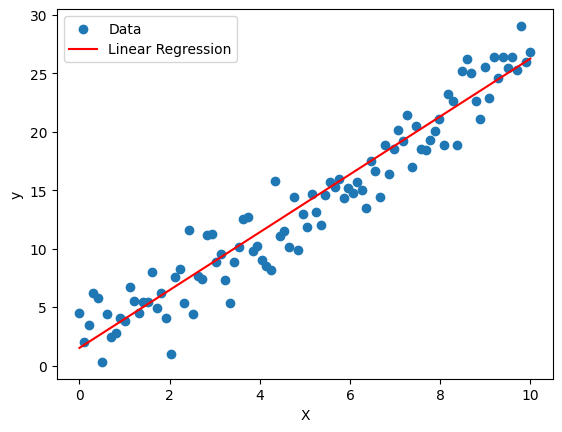

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Quick example 1


# Generate sample data
np.random.seed(0)
X = np.linspace(0, 10, 100)
y = 2.5 * X + 1.0 + np.random.randn(100) * 2  # y = 2.5x + 1 with noise

# Reshape X to be a column vector
X = X.reshape(-1, 1)

# Define the model using the Functional API
i = Input(shape=(1,))
x = Dense(1)(i)
model = Model(inputs=i, outputs=x)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.1), loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=100, verbose=0)

# Predict using the model
y_pred = model.predict(X)

# Visualize the original data and the model's predictions
plt.scatter(X, y, label='Data')
plt.plot(X, y_pred, color='red', label='Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Print the summary of the model
model.summary()


Let us add some more patterns into our data set, a sine wave is a great example

Epoch 1/100
7/7 [==============================] - 1s 4ms/step - loss: 5.0867 - accuracy: 0.0050 
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 1.6017 - accuracy: 0.0050
Epoch 3/100
7/7 [==============================] - 0s 4ms/step - loss: 0.8915 - accuracy: 0.0050
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6241 - accuracy: 0.0050
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6027 - accuracy: 0.0050
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 0.5125 - accuracy: 0.0050
Epoch 7/100
7/7 [==============================] - 0s 3ms/step - loss: 0.5771 - accuracy: 0.0050
Epoch 8/100
7/7 [==============================] - 0s 3ms/step - loss: 0.5057 - accuracy: 0.0050
Epoch 9/100
7/7 [==============================] - 0s 4ms/step - loss: 0.5044 - accuracy: 0.0050
Epoch 10/100
7/7 [==============================] - 0s 4ms/step - loss: 0.5007 - accuracy: 0.0050
Epoch 11/100
7/7 [==========

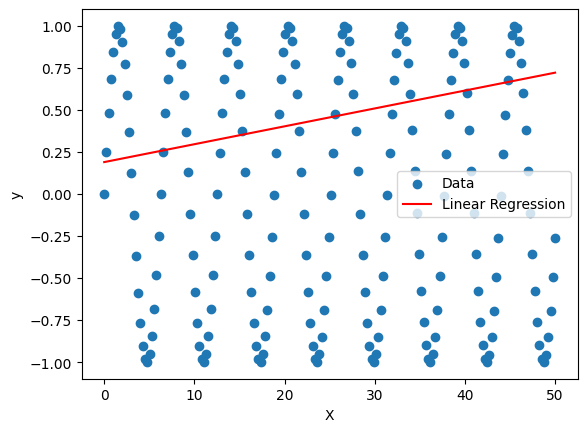

In [ ]:
x_data = np.linspace(0, 50, 200)
y_data = np.sin(x_data)

# Define the model using the Functional API
i = Input(shape=(1,))
x = Dense(1)(i)
model = Model(inputs=i, outputs=x)

model.compile(optimizer=Adam(learning_rate=0.1), loss='mean_squared_error', metrics =['accuracy'])

r = model.fit(x_data, y_data, epochs=100)

y_pred = model.predict(x_data)

# Visualize the original data and the model's predictions
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, y_pred, color='red', label='Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


As we can see simple linear regression works great in some tasks, but here it doesnt tell us much.

# Auto regressive models for wave predictions

## This is the wrong way to make predictions in an autoregressive model. We do not use future data to make predictions this section of the colab shows how we can easily be misguided into thinking out model works well

Epoch 1/20
3/3 [==============================] - 1s 5ms/step - loss: 0.3571
Epoch 2/20
3/3 [==============================] - 0s 5ms/step - loss: 0.2282
Epoch 3/20
3/3 [==============================] - 0s 4ms/step - loss: 0.1333
Epoch 4/20
3/3 [==============================] - 0s 4ms/step - loss: 0.0721
Epoch 5/20
3/3 [==============================] - 0s 4ms/step - loss: 0.0347
Epoch 6/20
3/3 [==============================] - 0s 4ms/step - loss: 0.0174
Epoch 7/20
3/3 [==============================] - 0s 4ms/step - loss: 0.0114
Epoch 8/20
3/3 [==============================] - 0s 4ms/step - loss: 0.0111
Epoch 9/20
3/3 [==============================] - 0s 4ms/step - loss: 0.0112
Epoch 10/20
3/3 [==============================] - 0s 4ms/step - loss: 0.0103
Epoch 11/20
3/3 [==============================] - 0s 4ms/step - loss: 0.0079
Epoch 12/20
3/3 [==============================] - 0s 4ms/step - loss: 0.0052
Epoch 13/20
3/3 [==============================] - 0s 4ms/step - loss: 0.

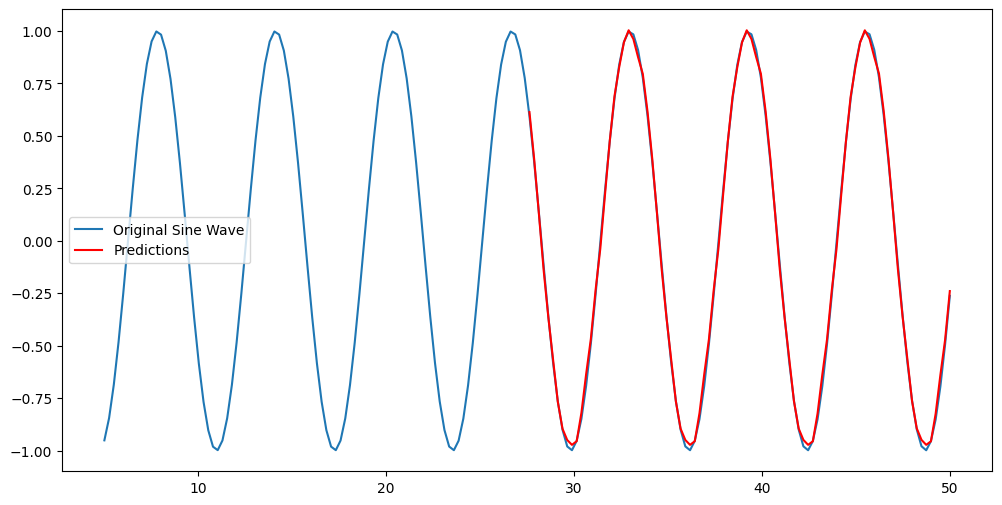

Model: "model_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_35 (InputLayer)       [(None, 20)]              0         
                                                                 
 dense_59 (Dense)            (None, 50)                1050      
                                                                 
 dense_60 (Dense)            (None, 1)                 51        
                                                                 
Total params: 1101 (4.30 KB)
Trainable params: 1101 (4.30 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:

X = x_data
y = y_data

window_size = 20
X_seq, y_seq = [], []
for i in range(len(X) - window_size):
    X_seq.append(y[i:i + window_size])
    y_seq.append(y[i + window_size])

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

split_index = len(X_seq) // 2
X_train, X_test = X_seq[:split_index], X_seq[split_index:]
y_train, y_test = y_seq[:split_index], y_seq[split_index:]

i = Input(shape=(window_size,))
x = Dense(50, activation='relu')(i)
x = Dense(1)(x)
model = Model(inputs=i, outputs=x)

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=20, verbose=1)

y_pred = model.predict(X_test)

plt.figure(figsize=(12, 6))
plt.plot(X[window_size:], y[window_size:], label='Original Sine Wave')
plt.plot(X[split_index + window_size:], y_pred, color='red', label='Predictions')
plt.legend()
plt.show()

model.summary()


## This is the right way to make predictions using an auto regressive model

Epoch 1/20
3/3 [==============================] - 2s 11ms/step - loss: 0.9302
Epoch 2/20
3/3 [==============================] - 0s 8ms/step - loss: 0.6989
Epoch 3/20
3/3 [==============================] - 0s 9ms/step - loss: 0.4995
Epoch 4/20
3/3 [==============================] - 0s 8ms/step - loss: 0.3470
Epoch 5/20
3/3 [==============================] - 0s 8ms/step - loss: 0.2295
Epoch 6/20
3/3 [==============================] - 0s 7ms/step - loss: 0.1431
Epoch 7/20
3/3 [==============================] - 0s 6ms/step - loss: 0.0820
Epoch 8/20
3/3 [==============================] - 0s 9ms/step - loss: 0.0440
Epoch 9/20
3/3 [==============================] - 0s 10ms/step - loss: 0.0207
Epoch 10/20
3/3 [==============================] - 0s 9ms/step - loss: 0.0100
Epoch 11/20
3/3 [==============================] - 0s 8ms/step - loss: 0.0074
Epoch 12/20
3/3 [==============================] - 0s 12ms/step - loss: 0.0076
Epoch 13/20
3/3 [==============================] - 0s 8ms/step - loss:

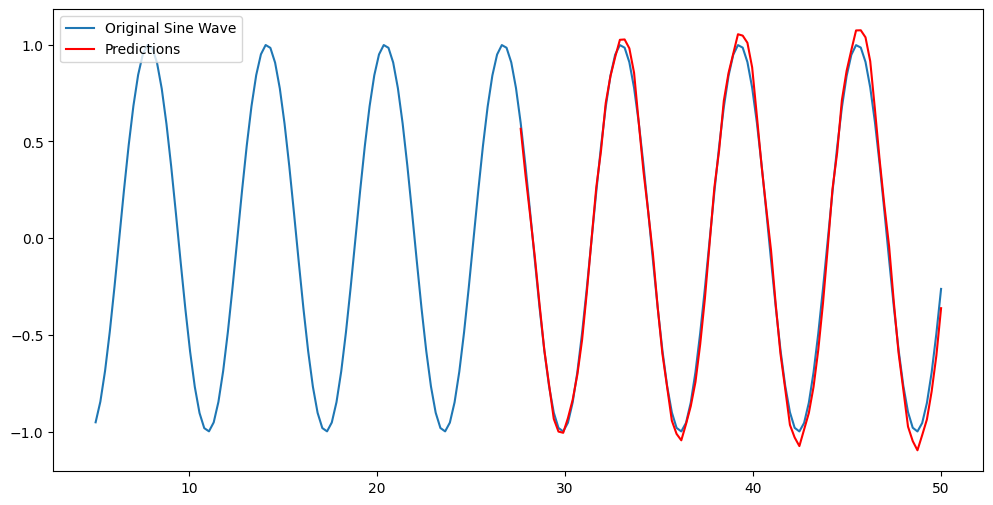

In [ ]:
X = x_data
y = y_data

window_size = 20
X_seq, y_seq = [], []
for i in range(len(X) - window_size):
    X_seq.append(y[i:i + window_size])
    y_seq.append(y[i + window_size])

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

split_index = len(X_seq) // 2
X_train, X_test = X_seq[:split_index], X_seq[split_index:]
y_train, y_test = y_seq[:split_index], y_seq[split_index:]

i = Input(shape=(window_size,))
x = Dense(50, activation='relu')(i)
x = Dense(1)(x)
model = Model(inputs=i, outputs=x)

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=20, verbose=1)


# Note the difference in how we make predictions, we do not reffer to future data. We make predictions only with the first but of the dataset just to start our model predictions
y_pred = []
current_input = X_test[0].reshape(1, -1)  # Start with the first window in the test set


for _ in range(len(X_test)):
    next_pred = model.predict(current_input,verbose = 0)[0, 0]
    y_pred.append(next_pred,)
    current_input = np.append(current_input[:, 1:], [[next_pred]], axis=1)

plt.figure(figsize=(12, 6))
plt.plot(X[window_size:], y[window_size:], label='Original Sine Wave')
plt.plot(X[split_index + window_size:], y_pred, color='red', label='Predictions')
plt.legend()
plt.show()

# Bonus- A sine wave with noise

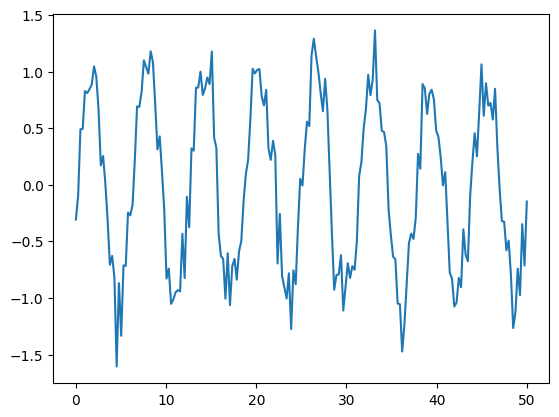

In [ ]:
# Lets Generate a sine wave with noise
X = x_data
y = np.sin(x_data) + np.random.normal(0, 0.2, 200)

plt.plot(x, y)
plt.show()

Epoch 1/20
3/3 [==============================] - 1s 5ms/step - loss: 0.2015
Epoch 2/20
3/3 [==============================] - 0s 5ms/step - loss: 0.1144
Epoch 3/20
3/3 [==============================] - 0s 4ms/step - loss: 0.0632
Epoch 4/20
3/3 [==============================] - 0s 5ms/step - loss: 0.0379
Epoch 5/20
3/3 [==============================] - 0s 4ms/step - loss: 0.0225
Epoch 6/20
3/3 [==============================] - 0s 5ms/step - loss: 0.0164
Epoch 7/20
3/3 [==============================] - 0s 4ms/step - loss: 0.0109
Epoch 8/20
3/3 [==============================] - 0s 4ms/step - loss: 0.0066
Epoch 9/20
3/3 [==============================] - 0s 4ms/step - loss: 0.0037
Epoch 10/20
3/3 [==============================] - 0s 4ms/step - loss: 0.0027
Epoch 11/20
3/3 [==============================] - 0s 4ms/step - loss: 0.0032
Epoch 12/20
3/3 [==============================] - 0s 4ms/step - loss: 0.0040
Epoch 13/20
3/3 [==============================] - 0s 4ms/step - loss: 0.

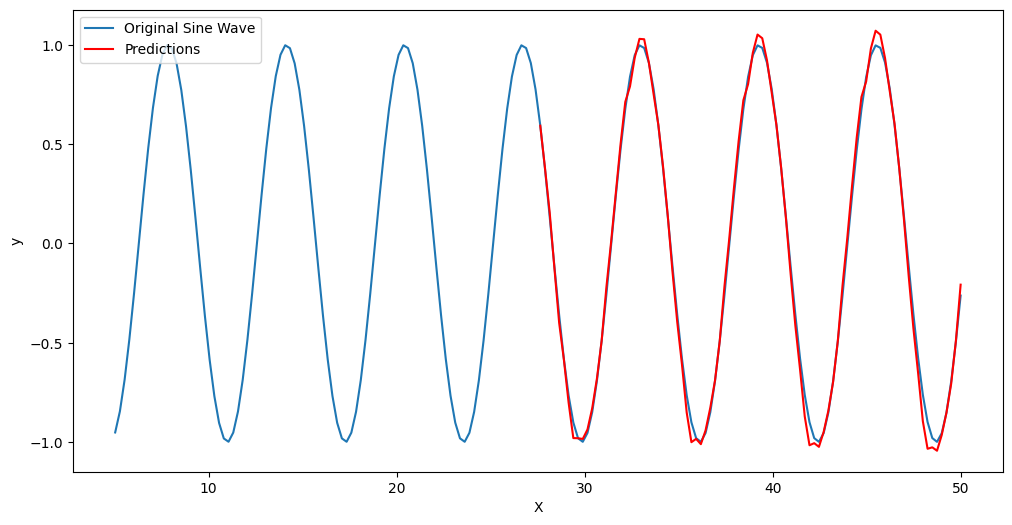

In [ ]:
window_size = 20
X_seq, y_seq = [], []
for i in range(len(X) - window_size):
    X_seq.append(y[i:i + window_size])
    y_seq.append(y[i + window_size])

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

split_index = len(X_seq) // 2
X_train, X_test = X_seq[:split_index], X_seq[split_index:]
y_train, y_test = y_seq[:split_index], y_seq[split_index:]

i = Input(shape=(window_size,))
x = Dense(50, activation='relu')(i)
x = Dense(1)(x)
model = Model(inputs=i, outputs=x)

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=20, verbose=1)


# Note the difference in how we make predictions, we do not reffer to future data. We make predictions only with the first but of the dataset just to start our model predictions
y_pred = []
current_input = X_test[0].reshape(1, -1)


for _ in range(len(X_test)):
    next_pred = model.predict(current_input,verbose = 0)[0, 0]
    y_pred.append(next_pred,)

    current_input = np.append(current_input[:, 1:], [[next_pred]], axis=1)

plt.figure(figsize=(12, 6))
plt.plot(X[window_size:], y[window_size:], label='Original Sine Wave')
plt.plot(X[split_index + window_size:], y_pred, color='red', label='Predictions')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

It still works well, note for further improvements we can try use other methods such as LSTM, GRU

For a proper challenge you can try and use reinforcement learning to predict the data